In [1]:
DATA_HOME = "data"
!ls "$DATA_HOME"


fanfics.txt  train.txt	val.txt


In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/rugpt3small_based_on_gpt2")

train_path = DATA_HOME + '/train.txt'
test_path = DATA_HOME + '/test.txt'

data_path = DATA_HOME + '/fanfics.txt'

Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.


In [3]:
from fastai.text import *

In [4]:
import torch
gpu = 2
torch.cuda.set_device(gpu)
print(f'cuda device: {torch.cuda.current_device()}')

cuda device: 2


In [5]:
from fastai.vision.all import *
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [6]:
from transformers import GPT2TokenizerFast, GPT2LMHeadModel
pretrained_weights = "sberbank-ai/rugpt3small_based_on_gpt2"
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.


In [7]:
tokenizer.pad_token = tokenizer.eos_token

In [8]:
model.config

GPT2Config {
  "_name_or_path": "sberbank-ai/rugpt3small_based_on_gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 2048,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 2048,
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "use_cache": true,
  "vocab_size": 50264
}

In [9]:

# source: https://huggingface.co/transformers/_modules/transformers/tokenization_utils_fast.html
    
# print('short-cut-names:',tokenizer.short-cut-names) 
# print()  

print('max_model_input_sizes')
for k,v in tokenizer.max_model_input_sizes.items():
    print('- ',k,v)
print()
    
print('model_max_length:',tokenizer.model_max_length)
print()

for k,v in tokenizer.pretrained_init_configuration.items():
    print(k,v)
    
print('padding_side:',tokenizer.padding_side)
print()

print('model_input_names:',tokenizer.model_input_names)
print()

print('bos_token & bos_token_id:',tokenizer.bos_token,tokenizer.bos_token_id)
print()

print('eos_token & eos_token_id:',tokenizer.eos_token,tokenizer.eos_token_id)
print()

print('unk_token & unk_token_id:',tokenizer.unk_token,tokenizer.unk_token_id)
print()

print('sep_token:',tokenizer.sep_token)
print()

print('pad_token, pad_token_id & pad_token_type_id:',tokenizer.pad_token,tokenizer.pad_token_id,tokenizer.pad_token_type_id)
print()

print('cls_token:',tokenizer.cls_token)
print()

print('mask_token:',tokenizer.mask_token)
print()

print('additional_special_tokens:',tokenizer.additional_special_tokens)
print()

print('all_special_tokens & all_special_ids:',tokenizer.all_special_tokens,tokenizer.all_special_ids)
print()

print('---------- vocab ----------')
print()

print('vocab_files_names:',tokenizer.vocab_files_names)
print()

for k,v in tokenizer.pretrained_vocab_files_map.items():
    print(k)
    for kk,vv in v.items():
        print('- ',kk,':',vv)
    print()
    
print('vocab_size:',tokenizer.vocab_size)
print()
#print(tokenizer.get_vocab())


Using sep_token, but it is not set yet.
Using cls_token, but it is not set yet.
Using mask_token, but it is not set yet.


max_model_input_sizes
-  gpt2 1024
-  gpt2-medium 1024
-  gpt2-large 1024
-  gpt2-xl 1024
-  distilgpt2 1024

model_max_length: 1000000000000000019884624838656

padding_side: right

model_input_names: ['attention_mask']

bos_token & bos_token_id: <|endoftext|> 50257

eos_token & eos_token_id: <|endoftext|> 50257

unk_token & unk_token_id: <|endoftext|> 50257

sep_token: None

pad_token, pad_token_id & pad_token_type_id: <|endoftext|> 50257 0

cls_token: None

mask_token: None

additional_special_tokens: []

all_special_tokens & all_special_ids: ['<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>'] [50257, 50257, 50257, 50257]

---------- vocab ----------

vocab_files_names: {'vocab_file': 'vocab.json', 'merges_file': 'merges.txt', 'tokenizer_file': 'tokenizer.json'}

vocab_file
-  gpt2 : https://huggingface.co/gpt2/resolve/main/vocab.json
-  gpt2-medium : https://huggingface.co/gpt2-medium/resolve/main/vocab.json
-  gpt2-large : https://huggingface.co/gpt2-large/resolve/

In [10]:
import pandas as pd
import numpy as np
with open(data_path, "r") as file:
    text = file.readlines()
texts_df = pd.DataFrame(text, columns=['text'])
texts_df.head()

,text
0,"— Я обещаю тебе, что совершу чудо. Ты веришь мне? Холодный майский ветер унес эти слова, оставляя их лишь тому, кому они изначально адресованы. Девушка улыбнулась, нотка счастья показалась на ее лице, однако ничего не могло утешить ее, успокоить ту тревогу, которая еще давно легла на сердце. Вновь вернулся грустный, почти убитый взгляд. А мужчина все крепче прижимал её маленькое, слабое тело к себе. Он хотел защитить ее, но совсем скоро ему предстоит уйти. Может быть, навсегда. — Вернись, пожалуйста, — сквозь слезы прошептала она, — ты ведь нужен не только мне, но и всей своей семье, солнц..."
1,"Осень такая пора, Тебя никто не поймет не когда. И сколько не делай для этих людей, Они по другому к тебе отнесутся, Ведь им плевать на ваши чувства. Они не чувствуют,не дышат, Они не знают что такое боль. Но иногда от них хочется услышать, Что наконец,все будет хорошо.\n"
2,"Это ты, И я играю с тобой, Это ты, И мне не кто не нужен другой, Это ты, Я играю с тобой, Это ты, Я люблю тебя, Это ты,И не кому не отдам, Это ты... Я играю с тобой словами любви, И это снова ты, Проклинаю тебя, За твои грехи, Это снова ты.\n"
3,"На кладбище было тихо. Вопреки настроению, солнце безжалостно светило, не думая о людях. Два мага стояли возле свежей могилы. Ученик и учитель, молодой парень и седой старик. По щекам юнца текли слезы, но взгляд его был тверд. - Учитель, но я ведь все равно смогу увидеть их. Печально посмотрел на него старик: - Нет, дорогой, твоих родителей не вернуть. - Но почему?! Я теперь могу это! Я некромант! Отчаянный крик парня разорвал тишину. - Послушай, мой ученик. Есть одно правило, самое главное для некроманта. Никогда, ни за что не воскрешай своих любимых. - Как же?... - ученик перестал плакат..."
4,"Нирн - мир где много красивых мест, шумных городов, мелких деревушек, девственных лесов, а так же кровопролитных войн где люди и нелюди, жаждут власти и повиновения, где костром сжигают деревни, осаждают города, уничтожают леса, мир находится на грани уничтожения, но в пророчестве гласит «Время и место каждого Подвига определяется Судьбой. Но если не придёт Герой — не будет и Подвига.» Неизвестный автор, это пророчество было указано еще на древних свитках найденых под красной горой. Этот свиток лежал в руках богини Азуры. Расы населяющие Нирн Флориан - человек-растение. С виду Флориане без..."


In [11]:
num = int(0.8*len(texts_df))

idxs = np.random.randint(0, len(texts_df), len(texts_df))
idxs_train = idxs[:num]
idxs_val = idxs[num:]

In [12]:
%%time
all_texts = np.concatenate([texts_df.iloc[idxs_train].text.values, texts_df.iloc[idxs_val].text.values])

CPU times: user 2.11 ms, sys: 168 µs, total: 2.28 ms
Wall time: 1.92 ms


In [13]:

from fastai.data.core import TfmdLists
from fastai.text.data import LMDataLoader
splits = [list(idxs_train), list(idxs_val)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [14]:
tls.train[0],tls.valid[0]

(tensor([ 1098,  1167, 31303,  ..., 16120,   655,   372]),
 tensor([ 677,  502, 3968,  ...,  975,   18,  203]))

In [15]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([1588]), torch.Size([18756]))

In [16]:
show_at(tls.train, 0)

Лучи февральского солнца заинтересованно, будь-то фсбэшники, в переписки школьников, проглядывали сквозь изумрудные шторы в тёмную комнату и указывали на юную 18-ти летнюю девушку, лежащую в своей кровати под тёплым одеялом. Она ощущала себя маленьким котёнком, попавшим в плен коробки, но в нашем случае коробкой являлась мягкая кровать, с которой невозможно подняться и чувствуешь себя настоящим заложником, мира грёз, котиков и тёплого одеялка. Но будильник надзиратель делает своё дело и ты бурча свои коронные проклятия под нос, чуть не в плотную здороваясь с дверью, плетёшься на кухню, за своим утренним спасителем в лице кофе. В последнее время неуклюжесть Влады уж слишком разыгралась и на днях решила познакомить её мизинец и край дивана лично и через - чур близко, теперь девушка в свое единственный выходной должна идти к хирургу, и выслушивать все новые сплетни от местный бабулек в очереди. Отвлёкшись от своих мыслей, Лада взглянула на часы и как ошпаренная вскочила с места - охуенно,

In [17]:
%%time
bs,sl = 8,1024
dls = tls.dataloaders(bs=bs, seq_len=sl)

CPU times: user 3min 14s, sys: 2.12 s, total: 3min 16s
Wall time: 3min 17s


In [18]:
%%time
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

CPU times: user 3min 13s, sys: 735 ms, total: 3min 14s
Wall time: 3min 13s


In [19]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        return x if isinstance(x, Tensor) else tokenize(x)
        
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [20]:
%%time
tls2 = TfmdLists(tokenized, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls2 = tls.dataloaders(bs=8, seq_len=1024)

CPU times: user 3min 18s, sys: 455 ms, total: 3min 19s
Wall time: 3min 19s


In [21]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [22]:
def splitter(model):
    "Split a GPT2 `model` in 3 groups for differential learning rates."
    
    # First layers group : decoder blocks from 0 to 3
    modules = []
    for i in range(4): modules.append(model.transformer.h[i])
    groups = [nn.Sequential(*modules)]

    # Second layers group : decoder blocks from 4 to 7
    modules = []
    for i in range(4,8,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])

    # Third layers group : decoder blocks from 8 to 11
    modules = []
    for i in range(8,12,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])
    
    # Fourth layers group : embeddings matrices wte and wpe + LayerNorm at the model output
    groups = L(groups + [nn.Sequential(model.transformer.wte,model.transformer.wpe,model.transformer.ln_f)])
    
    return groups.map(params)

In [23]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(),
                splitter = splitter,
                cbs=[DropOutput], 
                metrics=[accuracy, Perplexity()]).to_fp16()

In [24]:
# Check the number of parameters groups and the hyperparameters values
learn.create_opt()
print(f'number of parameters groups: {len(learn.opt.param_groups)}')

# ... and the list of Learning Rates (before its atualization by the Optimizer of the function fit_one_cycle())
for i,h in enumerate(learn.opt.hypers):
    print(i,h)

number of parameters groups: 4
0 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
1 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
2 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
3 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}


In [36]:
learn.model = model.cuda()


In [37]:
learn.freeze()
learn.summary()

GPT2LMHeadModel (Input shape: 8)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 1024 x 768      
Embedding                                 38602752   True      
Embedding                                 1572864    True      
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     8 x 1024 x 2304     
Conv1D                                    1771776    False     
Conv1D                                    590592     False     
Dropout                                                        
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     8 x 1024 x 3072     
Conv1D                                    23623

### Unfreeze all layers

In [25]:
learn.unfreeze()
learn.summary()

GPT2LMHeadModel (Input shape: 8)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 1024 x 768      
Embedding                                 38602752   True      
Embedding                                 1572864    True      
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     8 x 1024 x 2304     
Conv1D                                    1771776    True      
Conv1D                                    590592     True      
Dropout                                                        
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     8 x 1024 x 3072     
Conv1D                                    23623

In [26]:
learn.fit_one_cycle(2, slice(1e-4/(2.6**4),1e-4))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.346202,3.260819,0.391420,26.070885,1:23:15
1,3.294159,3.213555,0.396845,24.867329,1:25:00


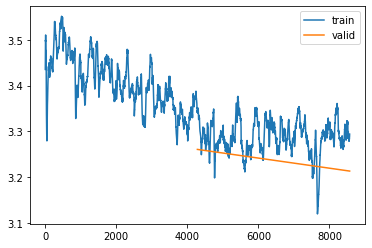

In [27]:

#hide
learn.recorder.plot_loss()

In [33]:
model_all = learn.model
prompt = "он посмотрел на меня"
input_ids = tokenizer.encode(prompt, return_tensors='pt').to('cuda')

### Generating (Top-k sampling)

In [37]:
%%time
#set top_k = 40 and num_return_sequences = 3
sample_outputs = model_all.generate(input_ids, pad_token_id=50264,
                                   do_sample=True, 
                                   max_length=500, 
                                   min_length=10,
                                   top_k=40,
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))
    print('\n---')

>> Generated text 1

он посмотрел на меня. - В смысле не… я его не видел. Хотя я и сам его не видел. А вы что здесь делаете? - Я же не говорил! - Устал. И ты меня не видел. - Я бы видел, конечно же. Но ты мне нужен. - Я? - Просто скажи, где ты и куда ты идёшь. - Не знаю, куда, но мне надо домой. - Да знаю. Мне тоже пора, пока. Удостоверившись, что всё закончилось, я вышел из автобуса и направился на остановку. Но на полпути остановился, чтобы посмотреть на автобус, так как из автобуса вышли ребята. Их не было, и я решил подождать их на остановке. Когда мои ребята подошли ко мне, то поинтересовались, куда я еду. - Это не важно, я не видел автобус пока. - Так. А сейчас что, ты уже еду? - Пока. Только у меня к вам просьба: не злитесь, если что-то не так. - Какая? - Не надо злиться на меня за то, что я не сказал, что мне нечего делать. - Всё хорошо. Я тоже так хочу. А ты что-то хотел? - Хотел, а что? - Заглянул в ваши паспорта. - Что сделал ты, когда узнал, что я у вас. Так-то ты точно мне

### Generating (Top-p nucleus sampling)

In [30]:
%%time
sample_outputs = model_all.generate(input_ids, pad_token_id=50256,
                                   do_sample=True,
                                   max_length=250, 
                                   min_length=10,
                                   repetition_penalty=1.2,
                                   temperature=0.7,
                                   top_k=50, 
                                   top_p=0.95, 
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))
    print('\n---')

>> Generated text 1

он посмотрел на меня. — Я не видел тебя, — произнёс он и улыбнулся. Мы смотрели друг другу в глаза. Он был прав, я действительно люблю его. - И ты тоже! – воскликнула я и обняла парня за шею, а затем поцеловала его в губы. Это было так неожиданно, что мне стало страшно, но это чувство не прошло бесследно, когда мы начали целоваться, чтобы поскорее убежать от этого разговора. Его руки обвивали мою талию и поглаживали её спину. У него были такие тёплые ладони, которые успокаивали меня, будто они просили прощения или любви у меня. - Мне пора идти, — сказал он. На улице стояла зима. Она была тёплой и дождливой. Зима вступила в свои права, но всё ещё казалась такой холодной. В воздухе витала атмосфера праздника. Изредка из-за туч выглядывали звёзды, но их свет всегда падал вниз, заставляя прохожих улыбаться. Снег быстро таял под лучами солнца, согревая нас своим теплом и лаской. Как же давно я ждала снега, ведь до того, как он пришёл к нам в гости, я даже представить се